In [1]:
import pandas as pd

df = pd.read_csv("c:/data/ozone/ozone.csv")

df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_12256\3965107599.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Month,Day,Solar.R,Wind,Temp,Ozone,Result
0,5,1,190.000000,7.4,67,41,0
1,5,2,118.000000,8.0,72,36,0
2,5,3,149.000000,12.6,74,12,0
3,5,4,313.000000,11.5,62,18,0
4,5,5,185.931507,14.3,56,42,1


<Axes: >

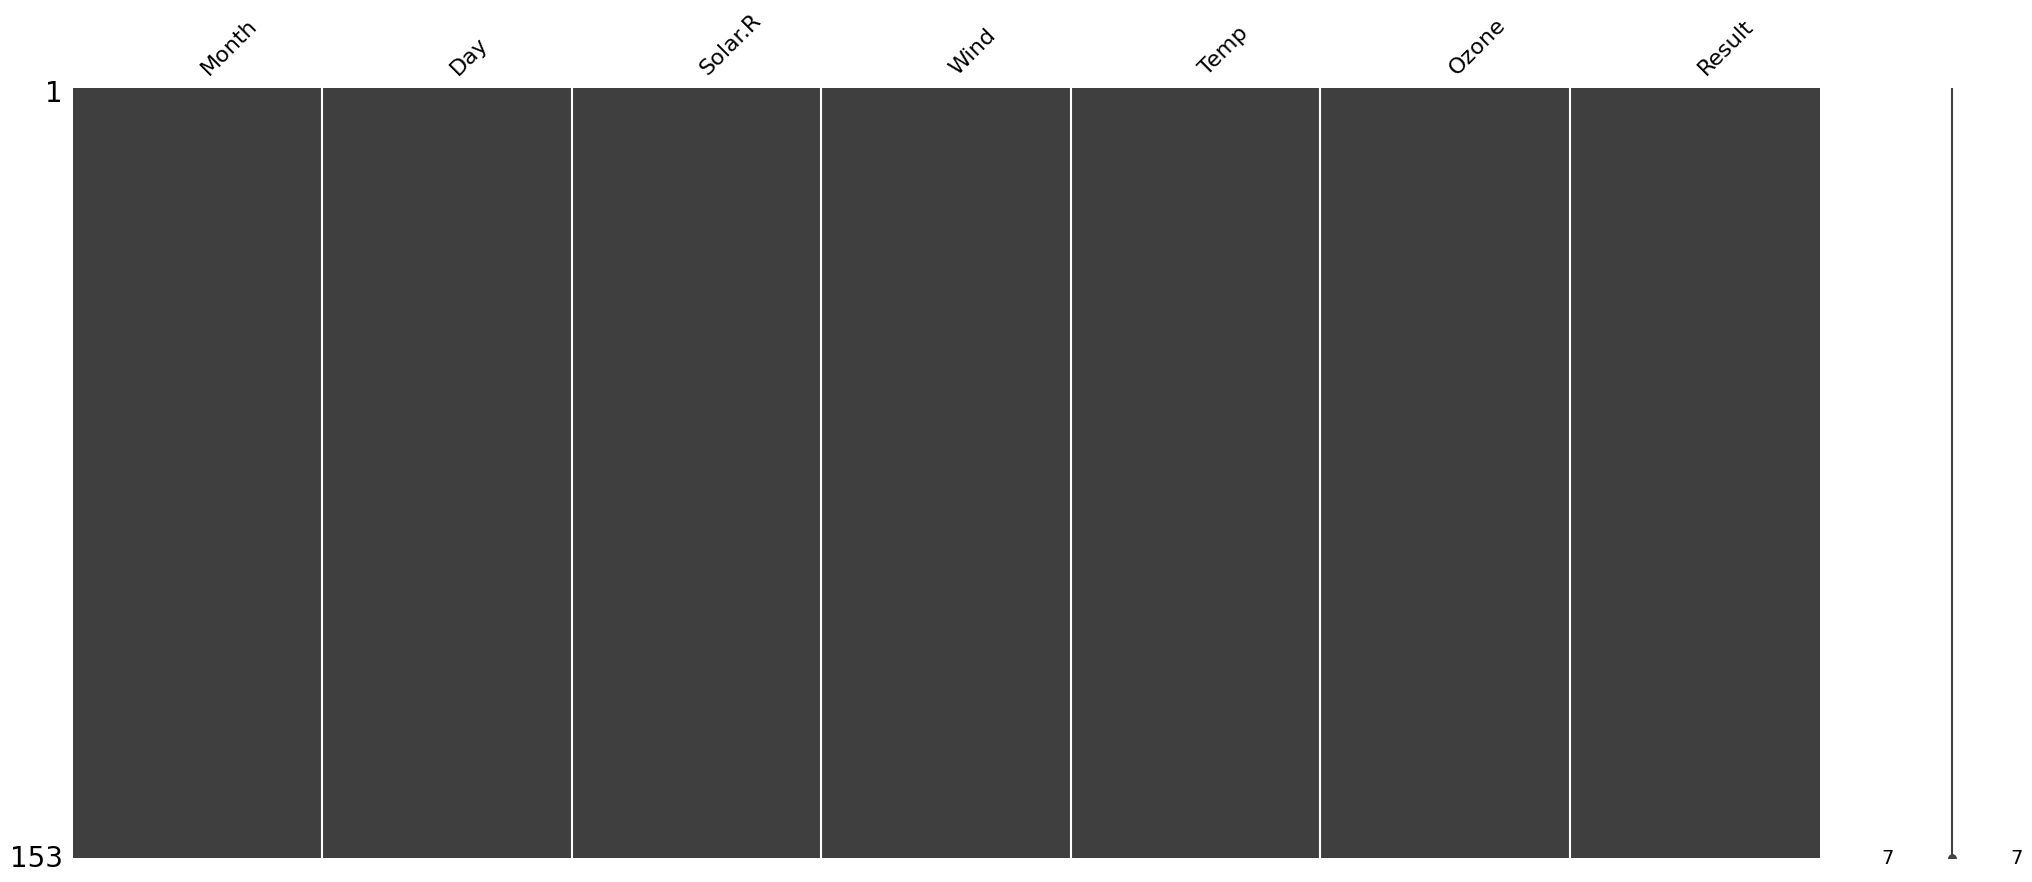

In [2]:
#오존량, 일조량 결측값 처리

import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df)
#흰색 - 결측값
#스파크라인 -  각 샘플의 데이터 완성도를 표현

In [3]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df

,Month,Day,Solar.R,Wind,Temp,Ozone,Result
0,5.0,1.0,190.000000,7.4,67.0,41.0,0.0
1,5.0,2.0,118.000000,8.0,72.0,36.0,0.0
2,5.0,3.0,149.000000,12.6,74.0,12.0,0.0
3,5.0,4.0,313.000000,11.5,62.0,18.0,0.0
4,5.0,5.0,185.931507,14.3,56.0,42.0,1.0
...,...,...,...,...,...,...,...
148,9.0,26.0,193.000000,6.9,70.0,30.0,0.0
149,9.0,27.0,145.000000,13.2,77.0,42.0,1.0
150,9.0,28.0,191.000000,14.3,75.0,14.0,0.0
151,9.0,29.0,131.000000,8.0,76.0,18.0,0.0


In [4]:
X = df[['Solar.R', 'Wind', 'Temp']]
y = df['Ozone']

In [5]:
import statsmodels.api as sm

model = sm.OLS(y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Ozone   R-squared (uncentered):                   0.831
Model:                            OLS   Adj. R-squared (uncentered):              0.828
Method:                 Least Squares   F-statistic:                              246.4
Date:                Thu, 14 Mar 2024   Prob (F-statistic):                    9.70e-58
Time:                        09:06:04   Log-Likelihood:                         -682.21
No. Observations:                 153   AIC:                                      1370.
Df Residuals:                     150   BIC:                                      1380.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Solar.R        0.0600      0.020      2.968      0.003       0.020       0.100
Wind          -3.4525      0.408     -8.462      0.000      -4.259      -2.646
Temp           0.8427      0.071     11.817      0.000       0.702       0.984
==============================================================================
Omnibus:                       40.913   Durbin-Watson:                   1.639
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.086
Skew:                           1.212   Prob(JB):                     4.07e-18
Kurtosis:                       5.586   Cond. No.                         52.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
# 일조량 82, 풍량 15.5, 화씨온도 84 일때의 오존량 예측
result.predict([92, 15.5, 84])

array([22.79160327])

In [7]:
result.save("c:/data/ozone/ozone_regress.model")

In [8]:
from statsmodels.regression.linear_model import OLSResults
# 학습된 모델 불러오기
model = OLSResults.load("c:/data/ozone/ozone_regress.model")

In [9]:
# 일조량 92, 풍량 15.5, 화씨온도 84일때의 오존량 예측
# 새로운 값 입력(학습된 순서대로)
result.predict([92, 15.5, 84])

array([22.79160327])

In [10]:
# 일조량 80, 풍량 5.5, 화씨온도 64일때의 오존량 예측
result.predict([80, 5.5, 64])

array([39.74253408])